In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Dataset with only Turn event
df_1 = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/04e10e0797.csv")

# Dataset with Turn and Walking event
df_2 = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/146bd622af.csv")

# Dataset with Turn and StartHesitation event
df_3 = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/166bc81085.csv")

The function below generates line plots for each dataset, showing the accelerometer signals over time. If FoG events are present, they are highlighted with distinct scatter points in different colors, marking the exact timestamps where the events occur.

In [3]:
def plot_fog_events(df, title):
    plt.figure(figsize=(14,6))

    # Convert Time index to seconds
    time_sec = df["Time"] / 128

    # Create figure with two panels (signals + event indicators)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True, 
                                   gridspec_kw={'height_ratios': [3, 1]})

    # Accelerometer signals 
    ax1.plot(time_sec, df["AccV"], label="AccV (Vertical)", alpha=0.8)
    ax1.plot(time_sec, df["AccML"], label="AccML (Mediolateral)", alpha=0.8)
    ax1.plot(time_sec, df["AccAP"], label="AccAP (Anteroposterior)", alpha=0.8)
    ax1.set_ylabel("Acceleration")
    ax1.set_title(title)
    ax1.legend(loc="upper right")
    ax1.grid(True, linestyle="--", alpha=0.5)

    # Event indicators (square waves) 
    if "StartHesitation" in df.columns:
        ax2.plot(time_sec, df["StartHesitation"], label="Start Hesitation", color="red")
    if "Turn" in df.columns:
        ax2.plot(time_sec, df["Turn"], label="Turn", color="green")
    if "Walking" in df.columns:
        ax2.plot(time_sec, df["Walking"], label="Walking", color="blue")

    ax2.set_ylabel("Event Indicator")
    ax2.set_xlabel("Time (seconds)")
    ax2.set_ylim(-0.1, 1.2)  # small margin for clarity
    ax2.legend(loc="upper right")
    ax2.grid(True, linestyle="--", alpha=0.5)

    plt.show()

<Figure size 1400x600 with 0 Axes>

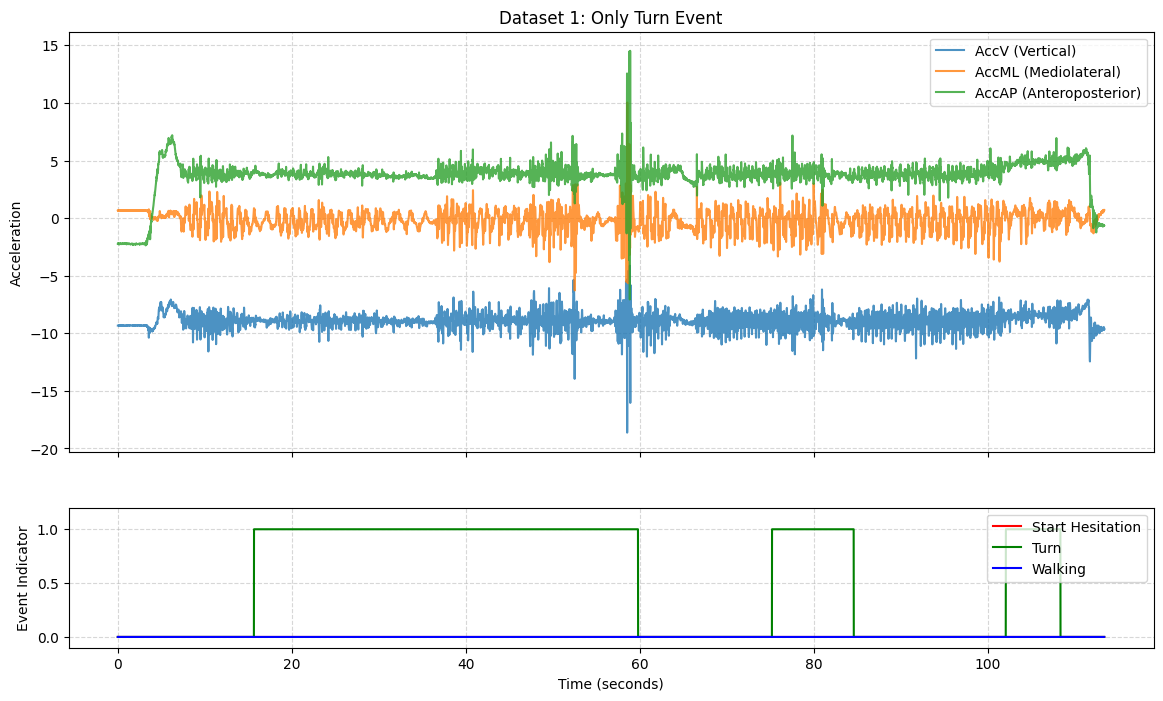

<Figure size 1400x600 with 0 Axes>

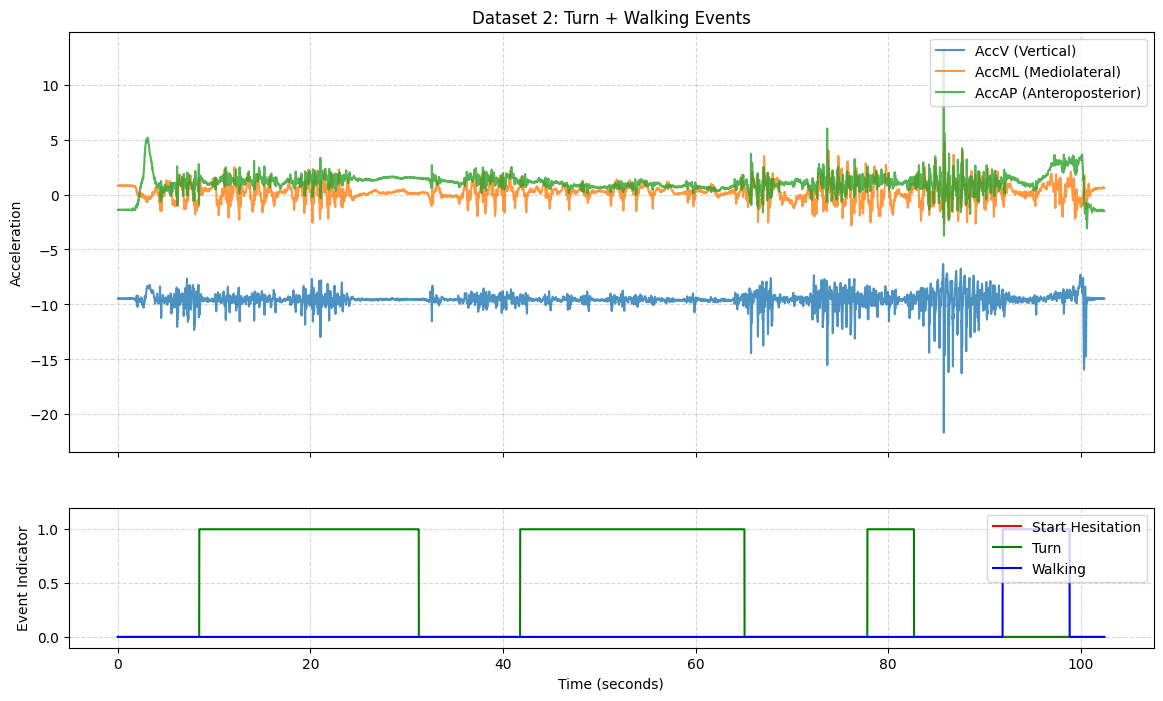

<Figure size 1400x600 with 0 Axes>

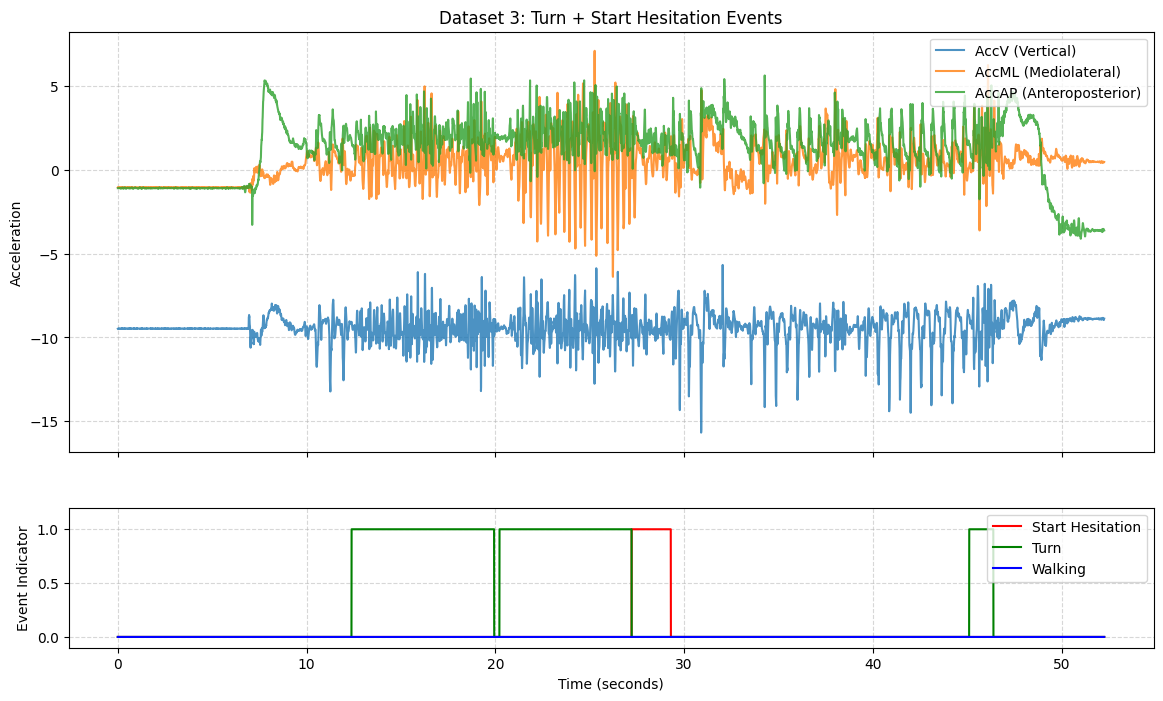

In [4]:
# Plotting all the datasets
plot_fog_events(df_1, "Dataset 1: Only Turn Event")
plot_fog_events(df_2, "Dataset 2: Turn + Walking Events")
plot_fog_events(df_3, "Dataset 3: Turn + Start Hesitation Events")